Kaggle Dataset: https://www.kaggle.com/datasets/tiagoadrianunes/imdb-top-5000-movies/data

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 1. Data Collection and Cleaning

In [269]:
imdb_data = pd.read_csv("results_with_crew.csv")

imdb_data

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3035155,142,Frank Darabont,"Stephen King, Frank Darabont",Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""..."
1,tt0068646,The Godfather,1972,2,9.2,2118800,175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Crime, Drama","<a href=""https://www.imdb.com/title/tt0068646""...","<a href=""https://www.imdb.com/title/tt0068646""..."
2,tt0468569,The Dark Knight,2008,3,9.0,3011856,152,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...","Action, Crime, Drama","<a href=""https://www.imdb.com/title/tt0468569""...","<a href=""https://www.imdb.com/title/tt0468569""..."
3,tt0167260,The Lord of the Rings: The Return of the King,2003,4,9.0,2072483,201,Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens, P...","Adventure, Drama, Fantasy","<a href=""https://www.imdb.com/title/tt0167260""...","<a href=""https://www.imdb.com/title/tt0167260""..."
4,tt0108052,Schindler's List,1993,5,9.0,1518412,195,Steven Spielberg,"Thomas Keneally, Steven Zaillian","Biography, Drama, History","<a href=""https://www.imdb.com/title/tt0108052""...","<a href=""https://www.imdb.com/title/tt0108052""..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,tt0116287,Fear,1996,4996,6.2,58507,97,James Foley,Christopher Crowe,"Drama, Thriller","<a href=""https://www.imdb.com/title/tt0116287""...","<a href=""https://www.imdb.com/title/tt0116287""..."
4996,tt0109068,Airheads,1994,4997,6.2,58037,92,Michael Lehmann,Rich Wilkes,"Comedy, Crime, Music","<a href=""https://www.imdb.com/title/tt0109068""...","<a href=""https://www.imdb.com/title/tt0109068""..."
4997,tt0109190,Baby's Day Out,1994,4998,6.2,58024,99,Patrick Read Johnson,John Hughes,"Adventure, Comedy, Crime","<a href=""https://www.imdb.com/title/tt0109190""...","<a href=""https://www.imdb.com/title/tt0109190""..."
4998,tt0947802,Lakeview Terrace,2008,4999,6.2,57709,110,Neil LaBute,"David Loughery, Howard Korder","Crime, Drama, Thriller","<a href=""https://www.imdb.com/title/tt0947802""...","<a href=""https://www.imdb.com/title/tt0947802""..."


In [270]:
budget_revenue = pd.read_csv("budget_revenue.csv")

budget_revenue

,Unnamed: 0,imdb_title,tmdb_titles,budget,revenue
0,0,The Shawshank Redemption,The Shawshank Redemption,25000000.0,2.834147e+07
1,1,The Godfather,The Godfather,6000000.0,2.450664e+08
2,2,The Dark Knight,The Dark Knight,185000000.0,1.004558e+09
3,3,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,94000000.0,1.118889e+09
4,4,Schindler's List,Schindler's List,22000000.0,3.213656e+08
...,...,...,...,...,...
4995,4995,Fear,Fear,0.0,2.100000e+06
4996,4996,Airheads,Airheads,15000000.0,5.751882e+06
4997,4997,Baby's Day Out,Baby's Day Out,50000000.0,1.667150e+07
4998,4998,Lakeview Terrace,Lakeview Terrace,20000000.0,2.764003e+07


## Merging IMDb and TMDB Datas
budget_revenue generated accordingly to imdb data using tmdb's APIs

In [271]:
# Deep copy of imdb_data
data = imdb_data.copy()
# Create new columns to data df, assigned from budget_revenue 
data[["tmdb_titles", "budget", "revenues"]] = budget_revenue[["tmdb_titles", "budget", "revenue"]]

data

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link,tmdb_titles,budget,revenues
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3035155,142,Frank Darabont,"Stephen King, Frank Darabont",Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""...",The Shawshank Redemption,25000000.0,2.834147e+07
1,tt0068646,The Godfather,1972,2,9.2,2118800,175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Crime, Drama","<a href=""https://www.imdb.com/title/tt0068646""...","<a href=""https://www.imdb.com/title/tt0068646""...",The Godfather,6000000.0,2.450664e+08
2,tt0468569,The Dark Knight,2008,3,9.0,3011856,152,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...","Action, Crime, Drama","<a href=""https://www.imdb.com/title/tt0468569""...","<a href=""https://www.imdb.com/title/tt0468569""...",The Dark Knight,185000000.0,1.004558e+09
3,tt0167260,The Lord of the Rings: The Return of the King,2003,4,9.0,2072483,201,Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens, P...","Adventure, Drama, Fantasy","<a href=""https://www.imdb.com/title/tt0167260""...","<a href=""https://www.imdb.com/title/tt0167260""...",The Lord of the Rings: The Return of the King,94000000.0,1.118889e+09
4,tt0108052,Schindler's List,1993,5,9.0,1518412,195,Steven Spielberg,"Thomas Keneally, Steven Zaillian","Biography, Drama, History","<a href=""https://www.imdb.com/title/tt0108052""...","<a href=""https://www.imdb.com/title/tt0108052""...",Schindler's List,22000000.0,3.213656e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,tt0116287,Fear,1996,4996,6.2,58507,97,James Foley,Christopher Crowe,"Drama, Thriller","<a href=""https://www.imdb.com/title/tt0116287""...","<a href=""https://www.imdb.com/title/tt0116287""...",Fear,0.0,2.100000e+06
4996,tt0109068,Airheads,1994,4997,6.2,58037,92,Michael Lehmann,Rich Wilkes,"Comedy, Crime, Music","<a href=""https://www.imdb.com/title/tt0109068""...","<a href=""https://www.imdb.com/title/tt0109068""...",Airheads,15000000.0,5.751882e+06
4997,tt0109190,Baby's Day Out,1994,4998,6.2,58024,99,Patrick Read Johnson,John Hughes,"Adventure, Comedy, Crime","<a href=""https://www.imdb.com/title/tt0109190""...","<a href=""https://www.imdb.com/title/tt0109190""...",Baby's Day Out,50000000.0,1.667150e+07
4998,tt0947802,Lakeview Terrace,2008,4999,6.2,57709,110,Neil LaBute,"David Loughery, Howard Korder","Crime, Drama, Thriller","<a href=""https://www.imdb.com/title/tt0947802""...","<a href=""https://www.imdb.com/title/tt0947802""...",Lakeview Terrace,20000000.0,2.764003e+07


## 1. Display the Top 5 Rows of Data

In [272]:
data.head()

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link,tmdb_titles,budget,revenues
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3035155,142,Frank Darabont,"Stephen King, Frank Darabont",Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""...",The Shawshank Redemption,25000000.0,2.834147e+07
1,tt0068646,The Godfather,1972,2,9.2,2118800,175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Crime, Drama","<a href=""https://www.imdb.com/title/tt0068646""...","<a href=""https://www.imdb.com/title/tt0068646""...",The Godfather,6000000.0,2.450664e+08
2,tt0468569,The Dark Knight,2008,3,9.0,3011856,152,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...","Action, Crime, Drama","<a href=""https://www.imdb.com/title/tt0468569""...","<a href=""https://www.imdb.com/title/tt0468569""...",The Dark Knight,185000000.0,1.004558e+09
3,tt0167260,The Lord of the Rings: The Return of the King,2003,4,9.0,2072483,201,Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens, P...","Adventure, Drama, Fantasy","<a href=""https://www.imdb.com/title/tt0167260""...","<a href=""https://www.imdb.com/title/tt0167260""...",The Lord of the Rings: The Return of the King,94000000.0,1.118889e+09
4,tt0108052,Schindler's List,1993,5,9.0,1518412,195,Steven Spielberg,"Thomas Keneally, Steven Zaillian","Biography, Drama, History","<a href=""https://www.imdb.com/title/tt0108052""...","<a href=""https://www.imdb.com/title/tt0108052""...",Schindler's List,22000000.0,3.213656e+08


## 2. Display the Bottom 5 Rows of the Data

In [273]:
data.tail()

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link,tmdb_titles,budget,revenues
4995,tt0116287,Fear,1996,4996,6.2,58507,97,James Foley,Christopher Crowe,"Drama, Thriller","<a href=""https://www.imdb.com/title/tt0116287""...","<a href=""https://www.imdb.com/title/tt0116287""...",Fear,0.0,2100000.0
4996,tt0109068,Airheads,1994,4997,6.2,58037,92,Michael Lehmann,Rich Wilkes,"Comedy, Crime, Music","<a href=""https://www.imdb.com/title/tt0109068""...","<a href=""https://www.imdb.com/title/tt0109068""...",Airheads,15000000.0,5751882.0
4997,tt0109190,Baby's Day Out,1994,4998,6.2,58024,99,Patrick Read Johnson,John Hughes,"Adventure, Comedy, Crime","<a href=""https://www.imdb.com/title/tt0109190""...","<a href=""https://www.imdb.com/title/tt0109190""...",Baby's Day Out,50000000.0,16671505.0
4998,tt0947802,Lakeview Terrace,2008,4999,6.2,57709,110,Neil LaBute,"David Loughery, Howard Korder","Crime, Drama, Thriller","<a href=""https://www.imdb.com/title/tt0947802""...","<a href=""https://www.imdb.com/title/tt0947802""...",Lakeview Terrace,20000000.0,27640028.0
4999,tt0109635,Disclosure,1994,5000,6.2,56351,128,Barry Levinson,"Michael Crichton, Paul Attanasio","Drama, Thriller","<a href=""https://www.imdb.com/title/tt0109635""...","<a href=""https://www.imdb.com/title/tt0109635""...",Disclosure,55000000.0,214015089.0


## 3. Get Information About the Data

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           5000 non-null   object 
 1   primaryTitle     5000 non-null   object 
 2   startYear        5000 non-null   int64  
 3   rank             5000 non-null   int64  
 4   averageRating    5000 non-null   float64
 5   numVotes         5000 non-null   int64  
 6   runtimeMinutes   5000 non-null   int64  
 7   directors        5000 non-null   object 
 8   writers          4974 non-null   object 
 9   genres           5000 non-null   object 
 10  IMDbLink         5000 non-null   object 
 11  Title_IMDb_Link  5000 non-null   object 
 12  tmdb_titles      4999 non-null   object 
 13  budget           4999 non-null   float64
 14  revenues         4999 non-null   float64
dtypes: float64(3), int64(4), object(8)
memory usage: 586.1+ KB


## 4. Get Overall Statistics of The Data

In [275]:
data.describe().map("{:.2f}".format)

,startYear,rank,averageRating,numVotes,runtimeMinutes,budget,revenues
count,5000.00,5000.00,5000.00,5000.00,5000.00,4999.00,4999.00
mean,2002.02,2500.50,7.14,163295.44,114.57,26336223.90,91076175.30
std,18.27,1443.52,0.60,240859.84,23.23,43257180.37,197364492.70
min,1915.00,1.00,5.90,25004.00,25.00,0.00,0.00
25%,1994.00,1250.75,6.70,40078.75,99.00,0.00,335090.00
50%,2007.00,2500.50,7.10,74546.50,111.00,10000000.00,19465835.00
75%,2015.00,3750.25,7.60,178531.25,126.00,30000000.00,86879456.00
max,2025.00,5000.00,9.30,3035155.00,374.00,460000000.00,2923706026.00


## 5. Get The Shape of the Merged Data

In [276]:
data.shape

(5000, 15)

## 6. Check Whether There is Any Null Values in the Dataset

In [277]:
data.isnull().any()

tconst             False
primaryTitle       False
startYear          False
rank               False
averageRating      False
numVotes           False
runtimeMinutes     False
directors          False
writers             True
genres             False
IMDbLink           False
Title_IMDb_Link    False
tmdb_titles         True
budget              True
revenues            True
dtype: bool

In [278]:
data.isnull().sum()

tconst              0
primaryTitle        0
startYear           0
rank                0
averageRating       0
numVotes            0
runtimeMinutes      0
directors           0
writers            26
genres              0
IMDbLink            0
Title_IMDb_Link     0
tmdb_titles         1
budget              1
revenues            1
dtype: int64

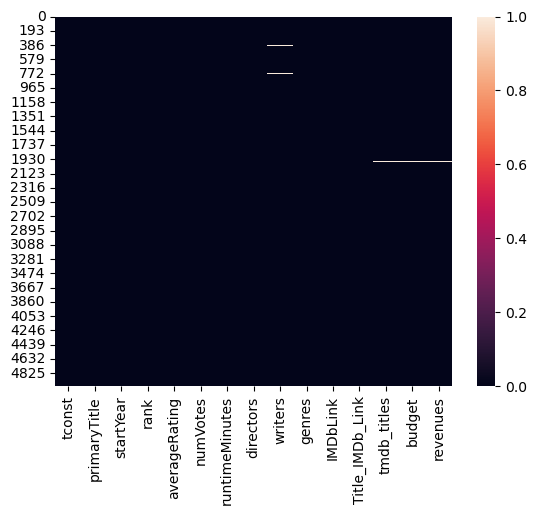

In [279]:
# Let's visualize where we have null values
sns.heatmap(data.isnull())
plt.show()

In [280]:
# Fill null values of writers column, with the list
data.loc[data["writers"].isnull(), "writers"]= [
    "David Attenborough",                    # David Attenborough: A Life on Our Planet
    "Jimmy Chin, Elizabeth Chai Vasarhelyi",                    # Free Solo 
    "Laura Poitras",                         # Citizenfour
    "Justin Folk",                    # What Is a Woman? 
    "Joshua Oppenheimer, Christine Cynn",    # The Act of Killing
    "Peter Jackson",                         # They Shall Not Grow Old
    "Steve James",                           # Hoop Dreams
    "Fred Rogers, Kevin Van Sant",           # Won't You Be My Neighbor?
    "Banksy, Jaimie D'Cruz",                 # Exit Through the Gift Shop
    "Ali Tabrizi",                    # Seaspiracy
    "Mark Monroe",                           # Apollo 11
    "Asif Kapadia",                          # Amy
    "David Gelb",                            # Jiro Dreams of Sushi
    "Ridley Scott, Robert David Port",       # Black Hawk Down
    "Frank Pavich",                          # Jodorowsky's Dune
    "Errol Morris",                          # The Fog of War
    "Daniel Roher",                          # Navalny
    "Chris Smith",                           # Jim & Andy: The Great Beyond
    "Alex Gibney",                           # Capturing the Friedmans
    "Andy Grieve",                           # The Imposter
    "Heidi Ewing, Enat Sidi, Rachel Grady",                    # Jesus Camp
    "Jenner Furst, Julia Willoughby Nason",  # Miss Americana
    "Kirby Dick, Amy Ziering",               # Fyre
    "Kenny Ortega, Michael Jackson",         # This Is It
    "Rudy Valdez",                           # American Murder: The Family Next Door
    "Henry Joost, Ariel Schulman"            # Catfish
]

In [281]:
data.isnull().sum()

tconst             0
primaryTitle       0
startYear          0
rank               0
averageRating      0
numVotes           0
runtimeMinutes     0
directors          0
writers            0
genres             0
IMDbLink           0
Title_IMDb_Link    0
tmdb_titles        1
budget             1
revenues           1
dtype: int64

This is one missing data, the tmdb_api.py couldn't pull from TMDB's API. But we have a list that contained which titles had
issues with gathering data from the API.

Error Titles:
['Yahsi Bati - The Ottoman Cowboys']

In [282]:
data.loc[data["primaryTitle"] == "Yahsi Bati - The Ottoman Cowboys", ["tmdb_titles", "budget", "revenues"]] = \
    ["Yahşi Batı", 2000000, 13565059]

In [283]:
data.isnull().sum()

tconst             0
primaryTitle       0
startYear          0
rank               0
averageRating      0
numVotes           0
runtimeMinutes     0
directors          0
writers            0
genres             0
IMDbLink           0
Title_IMDb_Link    0
tmdb_titles        0
budget             0
revenues           0
dtype: int64

## 7. Check For Duplicated Values

In [284]:
data.duplicated().any()

np.False_

## 8. Fill Zeros in Budget and Revenues Columns
Some movies have not reported their budget or revenues. Despite values are not labeled as missing they were provided
as '0' by the TMDB API.

In [285]:
# Replaces 0s in budget column with budget column's average
data.loc[data["budget"] == 0, "budget"] = data["budget"].mean()
# Replaces 0s in revenues column with revenues column's average
data.loc[data["revenues"] == 0, "revenues"] = data["revenues"].mean()

## 9. Fixing Different Movie Datas From IMDb and TMDb Datas

In [286]:
diff_fix = pd.read_csv("diff_fix.csv")
diff_fix.columns

Index(['Unnamed: 0', 'imdb_title', 'tmdb_title', 'budget', 'revenue'], dtype='object')

In [287]:
data.columns

Index(['tconst', 'primaryTitle', 'startYear', 'rank', 'averageRating',
       'numVotes', 'runtimeMinutes', 'directors', 'writers', 'genres',
       'IMDbLink', 'Title_IMDb_Link', 'tmdb_titles', 'budget', 'revenues'],
      dtype='object')

In [288]:
# iterrows() returns (index,row) pairs, we will ignore indexes with _
# for each row in diff_fix
for _, row in diff_fix.iterrows():
    # A list that contains imdb titles of rows
    imdb_title = row["imdb_title"]
    # if our data's primaryTitle matches with imdb_title in a row, exchange data's row's
    # tmdb_titles, budget, revenues columns with diff_fix's tmdb_title, budget, revenue columns
    data.loc[data["primaryTitle"] == imdb_title, ["tmdb_titles", "budget", "revenues"]] = \
        [row["tmdb_title"], row["budget"], row["revenue"]]

# 2. Feature Engineering

In [289]:
# Add a profit column to dataframe
data["profit"] = data["revenues"] - data["budget"]
# Add a roi (return of investment) column to dataframe
data["roi"] = data["profit"] / data["budget"]

In [290]:
# Classifying movies as good or average
data["good_or_avg"] = (data["averageRating"] >= 7.5).astype(int)

<Axes: xlabel='None', ylabel='numVotes'>

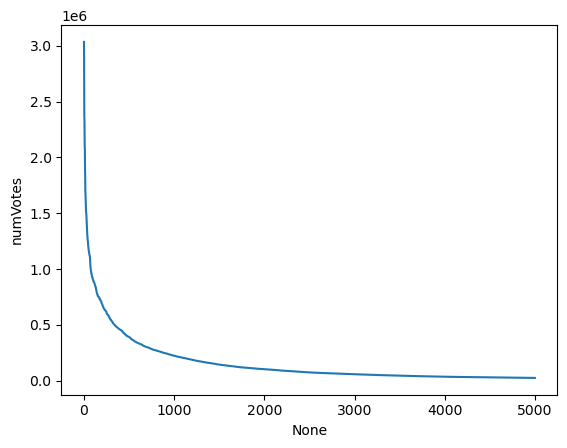

In [291]:
sns.lineplot(data=data.sort_values(by="numVotes", ascending=False), y="numVotes", x=data.index)

In [292]:
# Graph above suggests that 3 classes with 90 and 60 percentiles would fit data the best.
popularity_threshold_moderate = data['numVotes'].quantile(0.60)
popularity_threshold_very_popular = data['numVotes'].quantile(0.90)

print(popularity_threshold_moderate)
print(popularity_threshold_very_popular)

data["popularity"] = 0

103308.0
392651.4


In [293]:
# Moderately popular
data.loc[(data['numVotes'] >= popularity_threshold_moderate) &
         (data['numVotes'] < popularity_threshold_very_popular), 'popularity'] = 1

# Highly popular
data.loc[data['numVotes'] > popularity_threshold_very_popular, 'popularity'] = 2

data.sample(5)["popularity"]

2460    1
99      2
666     1
3837    0
2769    0
Name: popularity, dtype: int64

In [294]:
data.columns

Index(['tconst', 'primaryTitle', 'startYear', 'rank', 'averageRating',
       'numVotes', 'runtimeMinutes', 'directors', 'writers', 'genres',
       'IMDbLink', 'Title_IMDb_Link', 'tmdb_titles', 'budget', 'revenues',
       'profit', 'roi', 'good_or_avg', 'popularity'],
      dtype='object')

# 3. Exploratory Data Analysis

## 3.1 Univariate Analysis

### 1. Top 10 Movies by Rating

In [295]:
data.columns

Index(['tconst', 'primaryTitle', 'startYear', 'rank', 'averageRating',
       'numVotes', 'runtimeMinutes', 'directors', 'writers', 'genres',
       'IMDbLink', 'Title_IMDb_Link', 'tmdb_titles', 'budget', 'revenues',
       'profit', 'roi', 'good_or_avg', 'popularity'],
      dtype='object')

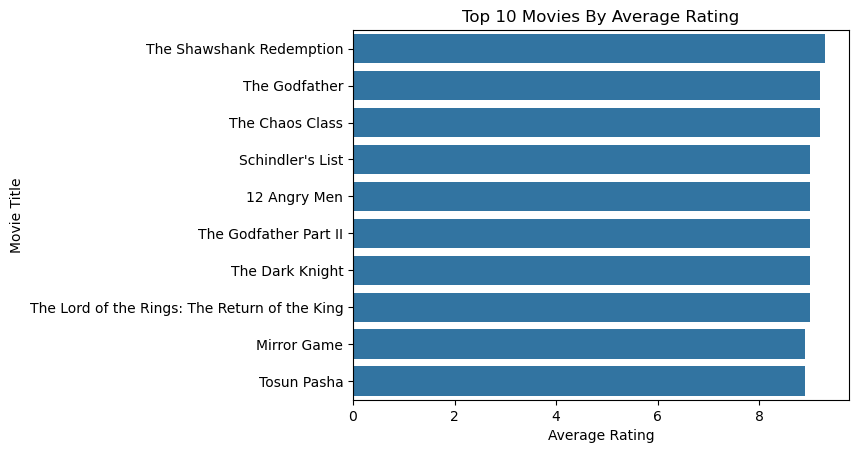

In [296]:
top_10_rating = data.sort_values(by="averageRating", ascending=False).head(10)
sns.barplot(y="primaryTitle", x="averageRating", data=top_10_rating, legend=False)
plt.title("Top 10 Movies By Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

### 2. Top 10 Movies by Budget

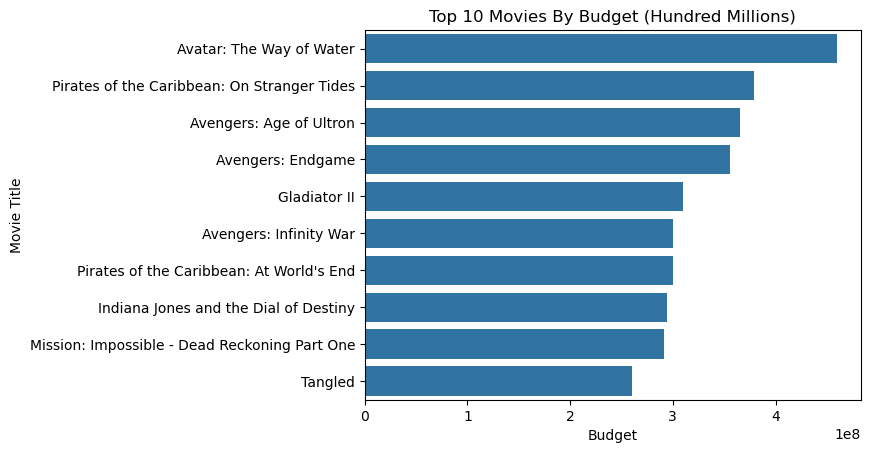

In [297]:
top_10_budget = data.sort_values(by="budget", ascending=False).head(10)
sns.barplot(y="primaryTitle", x="budget", data=top_10_budget, legend=False)
plt.title("Top 10 Movies By Budget (Hundred Millions)")
plt.xlabel("Budget")
plt.ylabel("Movie Title")
plt.show()

### 3. Top 10 Movies by Revenue

In [298]:
data.columns

Index(['tconst', 'primaryTitle', 'startYear', 'rank', 'averageRating',
       'numVotes', 'runtimeMinutes', 'directors', 'writers', 'genres',
       'IMDbLink', 'Title_IMDb_Link', 'tmdb_titles', 'budget', 'revenues',
       'profit', 'roi', 'good_or_avg', 'popularity'],
      dtype='object')

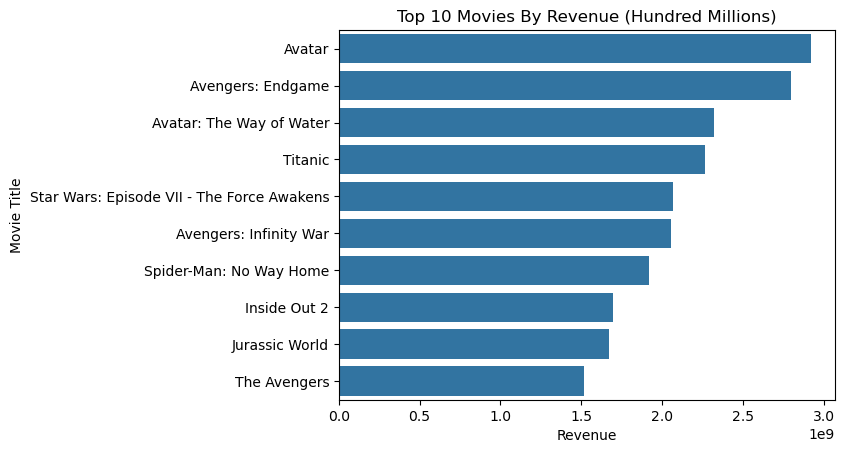

In [299]:
top_10_revenue = data.sort_values(by="revenues", ascending=False).head(10)
sns.barplot(y="primaryTitle", x="revenues", data=top_10_revenue, legend=False)
plt.title("Top 10 Movies By Revenue (Hundred Millions)")
plt.xlabel("Revenue")
plt.ylabel("Movie Title")
plt.show()

### 4. Longest 10 Movies by Runtime

In [300]:
data.columns

Index(['tconst', 'primaryTitle', 'startYear', 'rank', 'averageRating',
       'numVotes', 'runtimeMinutes', 'directors', 'writers', 'genres',
       'IMDbLink', 'Title_IMDb_Link', 'tmdb_titles', 'budget', 'revenues',
       'profit', 'roi', 'good_or_avg', 'popularity'],
      dtype='object')

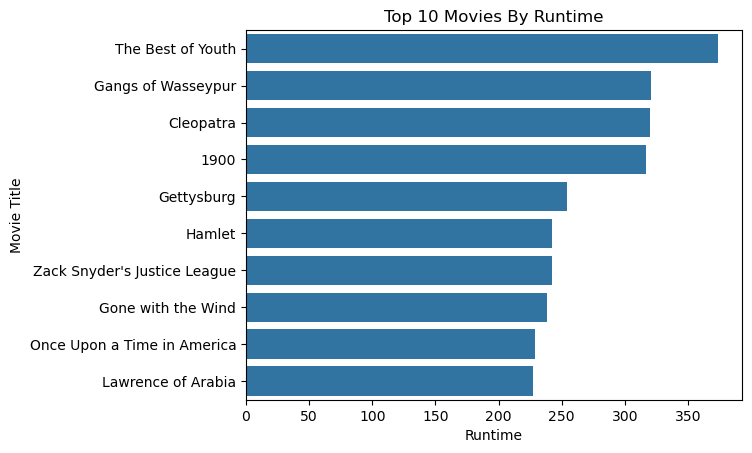

In [301]:
top_10_longest = data.sort_values(by="runtimeMinutes", ascending=False).head(10)
sns.barplot(y="primaryTitle", x="runtimeMinutes", data=top_10_longest, legend=False)
plt.title("Top 10 Movies By Runtime")
plt.xlabel("Runtime")
plt.ylabel("Movie Title")
plt.show()

### 5. Distribution of Movies Per Year (histplot)

In [302]:
data.columns

Index(['tconst', 'primaryTitle', 'startYear', 'rank', 'averageRating',
       'numVotes', 'runtimeMinutes', 'directors', 'writers', 'genres',
       'IMDbLink', 'Title_IMDb_Link', 'tmdb_titles', 'budget', 'revenues',
       'profit', 'roi', 'good_or_avg', 'popularity'],
      dtype='object')

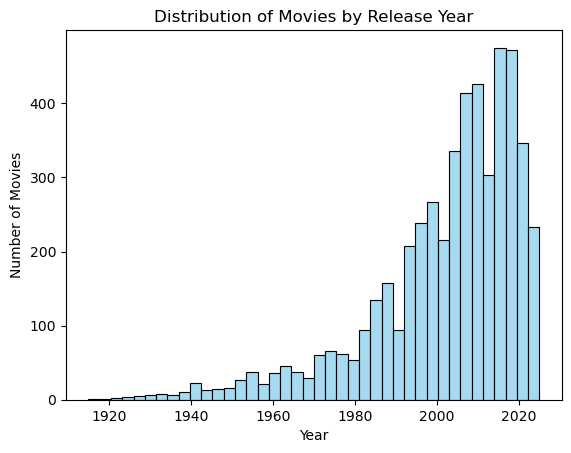

In [303]:
sns.histplot(data=data, x="startYear", bins=40, kde=False, color='skyblue')
plt.title("Distribution of Movies by Release Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

### 6. Distribution of Ratings

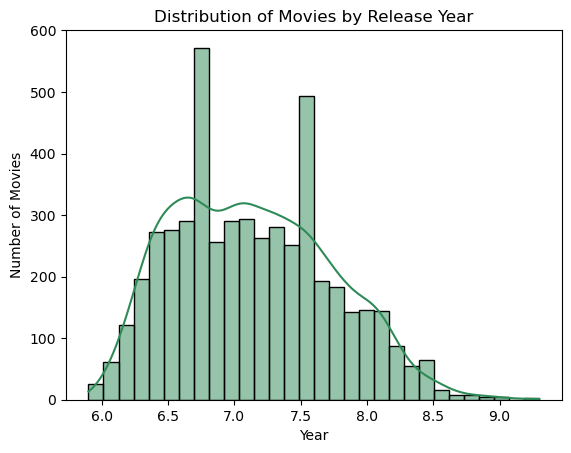

In [304]:
sns.histplot(data=data, x="averageRating", bins=30, kde=True, color='seagreen')
plt.title("Distribution of Movies by Release Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

### 7. Distribution of Budgets

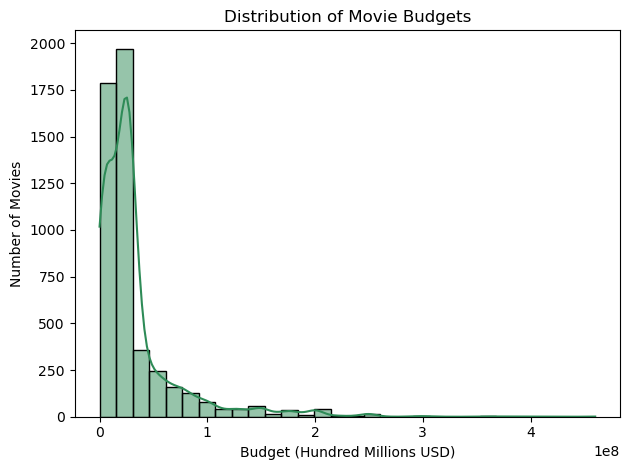

In [305]:
sns.histplot(data=data, x="budget", bins=30, kde=True, color="seagreen")
plt.title("Distribution of Movie Budgets")
plt.xlabel("Budget (Hundred Millions USD)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

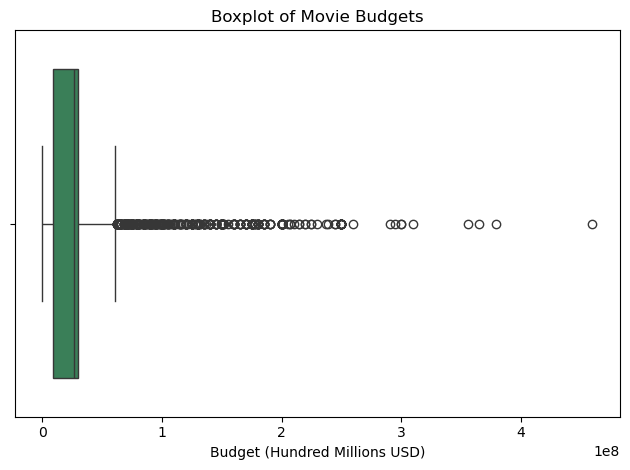

In [306]:
sns.boxplot(data=data, x="budget", color="seagreen")
plt.title("Boxplot of Movie Budgets")
plt.xlabel("Budget (Hundred Millions USD)")
plt.tight_layout()
plt.show()

## 3.2 Bivariate Analysis

### 1. Top 10 Directors That Has Generated The Most Revenue

In [307]:
data.columns

Index(['tconst', 'primaryTitle', 'startYear', 'rank', 'averageRating',
       'numVotes', 'runtimeMinutes', 'directors', 'writers', 'genres',
       'IMDbLink', 'Title_IMDb_Link', 'tmdb_titles', 'budget', 'revenues',
       'profit', 'roi', 'good_or_avg', 'popularity'],
      dtype='object')

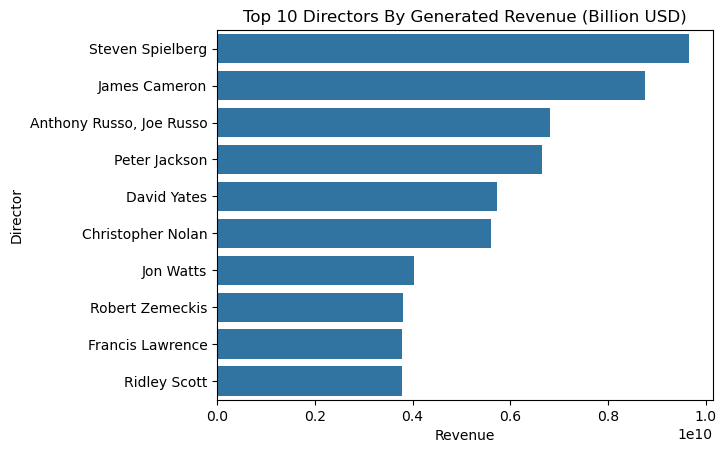

In [308]:
# Create a groupby object for directors
grouped_by_directors = data.groupby("directors")
# Top 10 directors by revenue
top_10_director_revenue = grouped_by_directors["revenues"].sum().\
            sort_values(ascending=False).reset_index().head(10)

sns.barplot(y="directors", x="revenues", data=top_10_director_revenue, legend=False)
plt.title("Top 10 Directors By Generated Revenue (Billion USD)")
plt.xlabel("Revenue")
plt.ylabel("Director")
plt.show()

### 2. Movies' Budgets vs. Revenues

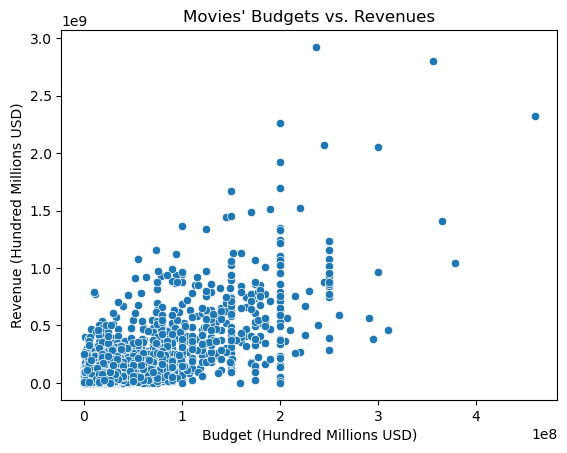

In [309]:
sns.scatterplot(data=data, x="budget", y="revenues")
plt.title("Movies' Budgets vs. Revenues")
plt.xlabel("Budget (Hundred Millions USD)")
plt.ylabel("Revenue (Hundred Millions USD)")
plt.show()

### 3. Rating vs ROI

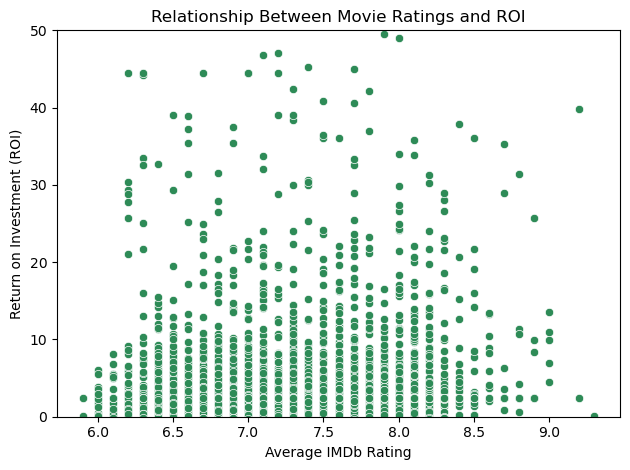

In [310]:
sns.scatterplot(data=data, x="averageRating", y="roi", color="seagreen")
plt.title("Relationship Between Movie Ratings and ROI")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Return on Investment (ROI)")
plt.ylim(0, 50)
plt.tight_layout()
plt.show()

### 4. Profitability vs Rating

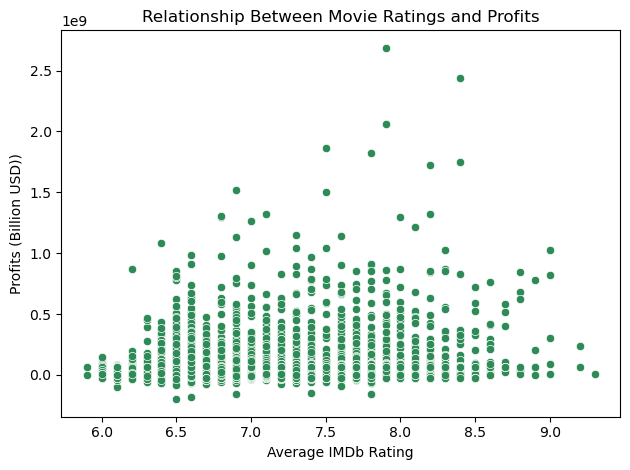

In [311]:
sns.scatterplot(data=data, x="averageRating", y="profit", color="seagreen")
plt.title("Relationship Between Movie Ratings and Profits")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Profits (Billion USD))")
plt.tight_layout()
plt.show()

### 5. Runtime vs Revenue

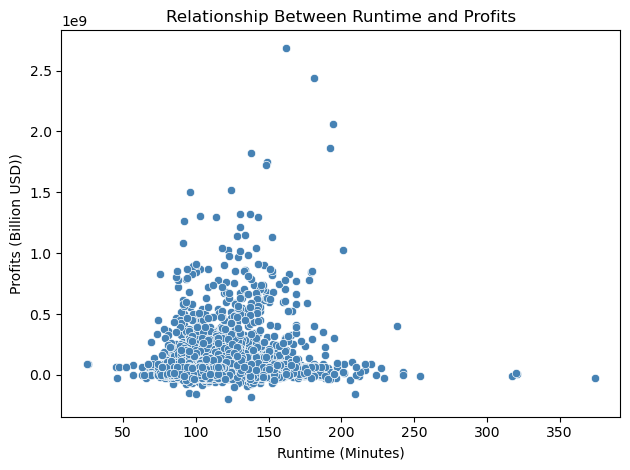

In [312]:
sns.scatterplot(data=data, x="runtimeMinutes", y="profit", color="steelblue")
plt.title("Relationship Between Runtime and Profits")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Profits (Billion USD))")
plt.tight_layout()
plt.show()

### 6. Correlation Heatmap of Numerical Columns

In [313]:
data.columns

Index(['tconst', 'primaryTitle', 'startYear', 'rank', 'averageRating',
       'numVotes', 'runtimeMinutes', 'directors', 'writers', 'genres',
       'IMDbLink', 'Title_IMDb_Link', 'tmdb_titles', 'budget', 'revenues',
       'profit', 'roi', 'good_or_avg', 'popularity'],
      dtype='object')

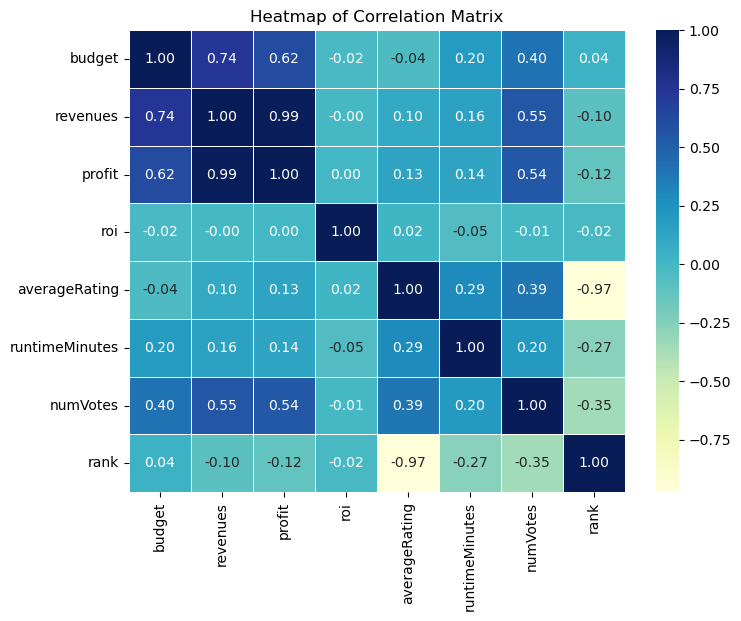

In [314]:
# Select numerical columns only
numeric_cols = data[["budget", "revenues", "profit", "roi", "averageRating", "runtimeMinutes", "numVotes", "rank"]]

# Calculate correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

# 4. Hypothesis Testing

### Hypothesis 1: Does Budget Affect IMDb Rating?
---
H₀ (Null Hypothesis): Movie budget has no effect on IMDb rating.

Hₐ (Alternative Hypothesis): Movie budget has an effect on IMDb rating.

In [315]:
# Pearson correlation
corr, p_val = pearsonr(data["budget"], data["averageRating"])

print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_val:.4f}")

Pearson correlation coefficient: -0.041
P-value: 0.0040


The correlation coefficient was -0.041 and p-value was 0.004.
This shows us a statistically significant result, but the correlation is very weak and negative, meaning there is no meaningful effect.

Conclusion: We reject the null hypothesis, but we interpret the effect as statistically significant but practically negligble.

### Hypothesis 2: Does Release Year Affect IMDb Rating?
---
H₀ (Null Hypothesis): Release year has no effect on IMDb rating.

Hₐ (Alternative Hypothesis): Release year has an effect on IMDb rating.

In [316]:
# Pearson correlation
corr, p_val = pearsonr(data["startYear"], data["averageRating"])

print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_val:.4f}")

Pearson correlation coefficient: -0.2738441618499259
P-value: 0.0000


The p-value is significantly less than 0.05, so we reject the null hypothesis.
The correlation is moderate and negative, showing that newer movies tend to have slightly lower ratings than older ones in this dataset.

Conclusion: We reject the null hypothesis. There is a statistically significant negative relationship between release year and IMDb rating.

### Hypothesis 3: Is There a Correlation Between Revenue and IMDb Rating?
---
H₀ (Null Hypothesis): There is no correlation between movie revenue and IMDb rating.

Hₐ (Alternative Hypothesis): There is a correlation between movie revenue and IMDb rating.

In [317]:
# Pearson correlation
corr, p_val = pearsonr(data["revenues"], data["averageRating"])

print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_val:.4f}")

Pearson correlation coefficient: 0.102
P-value: 0.0000


Although the correlation is statistically significant, it is very weak.
This suggests that while higher-rated movies may earn slightly more, the relationship is not strong enough to be practically meaningful.

Conclusion: We reject the null hypothesis, but we conclude that the correlation is weak and not particularly meaningful in practical terms.

### Hypothesis 4: Is There a Correlation Between Budget and Profit?
---
H₀ (Null Hypothesis): There is no correlation between a movie’s budget and its profit.

Hₐ (Alternative Hypothesis): There is a correlation between a movie’s budget and its profit.

In [318]:
# Pearson correlation
corr, p_val = pearsonr(data["profit"], data["budget"])

print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_val}")

Pearson correlation coefficient: 0.616
P-value: 0.0


Conclusion: We reject the null hypothesis and conclude that there is a statistically significant and moderately strong positive correlation between budget and profit.
This indicates that higher budgets are generally associated with higher profits, making the relationship practically meaningful as well.

### Hypothesis 5: Does Runtime Affect IMDb Rating?
---
H₀ (Null Hypothesis): There is no correlation between a movie’s runtime and its IMDb rating.

Hₐ (Alternative Hypothesis): There is a correlation between a movie’s runtime and its IMDb rating.

In [319]:
corr, p_val = pearsonr(data["runtimeMinutes"], data["averageRating"])

print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_val:.4f}")

Pearson correlation coefficient: 0.287
P-value: 0.0000


Although the correlation is statistically significant, the effect size is moderate.
This suggests that longer movies tend to have slightly higher IMDb ratings, but runtime is not a dominant factor in determining audience ratings.

Conclusion: We reject the null hypothesis and conclude that there is a statistically significant, moderately positive correlation between runtime and IMDb rating.

# 5. Machine Learning

5.1- Prediction of Profits using RandomForestRegressor

5.2- Prediction of Average Rating using XGBRegressor

5.3- Classifying Average and Good Movies using LogisticRegression

5.4- Classifying Popularity Level using RandomForestClassifier

5.5- Financial Profile Clustering using K-means Clustering

In [320]:
data.head(1)

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link,tmdb_titles,budget,revenues,profit,roi,good_or_avg,popularity
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3035155,142,Frank Darabont,"Stephen King, Frank Darabont",Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""...",The Shawshank Redemption,25000000.0,28341469.0,3341469.0,0.133659,1,2


In [321]:
data.columns

Index(['tconst', 'primaryTitle', 'startYear', 'rank', 'averageRating',
       'numVotes', 'runtimeMinutes', 'directors', 'writers', 'genres',
       'IMDbLink', 'Title_IMDb_Link', 'tmdb_titles', 'budget', 'revenues',
       'profit', 'roi', 'good_or_avg', 'popularity'],
      dtype='object')

In [322]:
data_cols = ["rank", "startYear", "averageRating", "numVotes", "runtimeMinutes", 
                 "budget", "revenues", "profit", "roi", "good_or_avg", "popularity"]

In [323]:
df = data.loc[:, data_cols]

df.head()

,rank,startYear,averageRating,numVotes,runtimeMinutes,budget,revenues,profit,roi,good_or_avg,popularity
0,1,1994,9.3,3035155,142,25000000.0,2.834147e+07,3.341469e+06,0.133659,1,2
1,2,1972,9.2,2118800,175,6000000.0,2.450664e+08,2.390664e+08,39.844402,1,2
2,3,2008,9.0,3011856,152,185000000.0,1.004558e+09,8.195584e+08,4.430046,1,2
3,4,2003,9.0,2072483,201,94000000.0,1.118889e+09,1.024889e+09,10.903074,1,2
4,5,1993,9.0,1518412,195,22000000.0,3.213656e+08,2.993656e+08,13.607526,1,2


## 5.1 Profit Prediction (Regression)

In [324]:
df.columns

Index(['rank', 'startYear', 'averageRating', 'numVotes', 'runtimeMinutes',
       'budget', 'revenues', 'profit', 'roi', 'good_or_avg', 'popularity'],
      dtype='object')

In [325]:
profit_predictors = ['rank', 'startYear', 'averageRating', 'numVotes', 'runtimeMinutes',
       'budget']

X = df.loc[:, profit_predictors]
y = df.loc[:, "profit"]

In [326]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X=X)

In [327]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

# Predict y values for the test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluation of the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R2 Score: {r2_rf:.4f}")

MAE: 57631057.29
MSE: 13011759404225938.00
RMSE: 114069099.25
R2 Score: 0.5256


## 5.2 Average Rating Prediction (Regression)

In [329]:
rating_predictors = ['startYear', 'numVotes', 'runtimeMinutes',
       'budget', "revenues"]

X = df.loc[:, rating_predictors]
y = df.loc[:, "averageRating"]

In [330]:
X = scaler.fit_transform(X=X)   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from xgboost import XGBRegressor

# n_estimators is set to 40, lowest error value tried for this model
xgb_model = XGBRegressor(random_state=42, n_estimators=40)
xgb_model.fit(X_train, y_train)

# Prediction
y_pred = xgb_model.predict(X_test)

# Evaluation of the model
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred)

print(f"MAE: {mae_xgb:.3f}")
print(f"MSE: {mse_xgb:.3f}")
print(f"RMSE: {rmse_xgb:.3f}")
print(f"R2 Score: {r2_xgb:.4f}")

MAE: 0.344
MSE: 0.191
RMSE: 0.437
R2 Score: 0.4320


## 5.3 Good or average Prediction (Binary Classification)

In [340]:
df.columns

Index(['rank', 'startYear', 'averageRating', 'numVotes', 'runtimeMinutes',
       'budget', 'revenues', 'profit', 'roi', 'good_or_avg', 'popularity'],
      dtype='object')

In [341]:
good_or_avg_clf = ['startYear', 'numVotes', 'runtimeMinutes',
       'budget', "revenues"]

X = df.loc[:, good_or_avg_clf]
y = df.loc[:, "good_or_avg"]

In [342]:
X = scaler.fit_transform(X=X)   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on test set
y_pred_logreg = logreg.predict(X_test)

# Evaluation of the model with classification report
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       717
           1       0.68      0.45      0.54       283

    accuracy                           0.78      1000
   macro avg       0.74      0.68      0.70      1000
weighted avg       0.77      0.78      0.77      1000



## 5.4 Popularity Level Classification (Multi-class Classification)

In [344]:
df.columns

Index(['rank', 'startYear', 'averageRating', 'numVotes', 'runtimeMinutes',
       'budget', 'revenues', 'profit', 'roi', 'good_or_avg', 'popularity'],
      dtype='object')

In [346]:
popularity_clf = ["rank", 'startYear', 'runtimeMinutes', "averageRating",
       'budget', "revenues"]

X = df.loc[:, popularity_clf]
y = df.loc[:, "popularity"]

In [347]:
X = scaler.fit_transform(X=X)   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Prediction of random forest classifier
y_pred_rf = rf_clf.predict(X_test)

# Evaluation of the model with classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       610
           1       0.80      0.80      0.80       295
           2       0.84      0.77      0.80        95

    accuracy                           0.88      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.88      0.88      0.88      1000



## 5.5 Financial Profile Clustering (Unsupervised Learning) (K-means Clustering)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# We'll use budget and revenues to find clusters with similar financial profiles
X_cluster = df[["budget", "revenues"]]

# Scale the data
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Find optimal number of clusters using silhouette score
scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_scaled)
    score = silhouette_score(X_cluster_scaled, labels)
    scores.append(score)

optimal_k = range(2, 7)[scores.index(max(scores))]
print(f"Optimal number of clusters: {optimal_k}")

# Fit KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_cluster_scaled)
df["cluster"] = clusters

# Evaluate clustering with silhouette score
sil_score = silhouette_score(X_cluster_scaled, clusters)
print(f"Silhouette Score: {sil_score:.3f}")

Optimal number of clusters: 2


Silhouette Score: 0.793


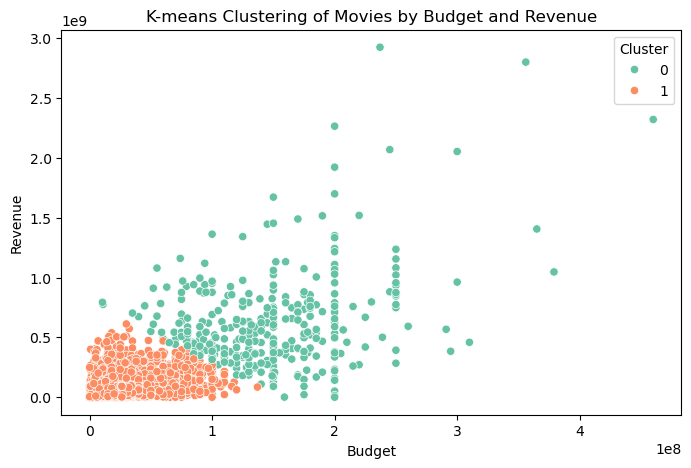

In [ ]:
# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x="budget", y="revenues", hue="cluster", data=df, palette="Set2")
plt.title("K-means Clustering of Movies by Budget and Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.legend(title="Cluster")
plt.show()